<a href="https://colab.research.google.com/github/HowardHNguyen/Marketing_Data_Science/blob/main/Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving Customer Churn Model.txt to Customer Churn Model.txt


{'Customer Churn Model.txt': b"State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?\r\nKS,128,415,382-4657,no,yes,25,265.100000,110,45.070000,197.400000,99,16.780000,244.700000,91,11.010000,10.000000,3,2.700000,1,False.\r\nOH,107,415,371-7191,no,yes,26,161.600000,123,27.470000,195.500000,103,16.620000,254.400000,103,11.450000,13.700000,3,3.700000,1,False.\r\nNJ,137,415,358-1921,no,no,0,243.400000,114,41.380000,121.200000,110,10.300000,162.600000,104,7.320000,12.200000,5,3.290000,0,False.\r\nOH,84,408,375-9999,yes,no,0,299.400000,71,50.900000,61.900000,88,5.260000,196.900000,89,8.860000,6.600000,7,1.780000,2,False.\r\nOK,75,415,330-6626,yes,no,0,166.700000,113,28.340000,148.300000,122,12.610000,186.900000,121,8.410000,10.100000,3,2.730000,3,False.\r\nAL,118,510,391-8027,yes,no,0,223.400000,98,37.980000,220.600000,101,1

In [ ]:
import pandas as pd
data=pd.read_csv('Customer Churn Model.txt')
account_length = data['Account Length']
account_length.head()

0    128
1    107
2    137
3     84
4     75
Name: Account Length, dtype: int64

In [ ]:
data.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
# 1 Selecting  column(s)
subdata = data[['Account Length','VMail Message','Day Calls']]
subdata.head()

,Account Length,VMail Message,Day Calls
0,128,25,110
1,107,26,123
2,137,0,114
3,84,0,71
4,75,0,113


In [ ]:
# 2 Selecting/Ignoring particular columns
wanted = ['Account Length','VMail Message','Day Calls']
column_list = data.columns.values.tolist()
sublist = [x for x in column_list if x not in wanted]
subdata = data[sublist]
subdata.head(2)

,State,Area Code,Phone,Int'l Plan,VMail Plan,Day Mins,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,415,382-4657,no,yes,265.1,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False.
1,OH,415,371-7191,no,yes,161.6,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.


In [ ]:
# 3 Selecting rows with row numbers and conditional filters
#data[1:50]    # first 50 rows, similar with [:50]
#data[25:75]   # select 50 rows from 25th
#data[:50]     
#data[51:]      # select all row except the first 50 rows

#data1 = data[data['Intl Mins']>500]
#data1.shape

#data1 = data[data['State']=='VA']
#data1.shape

data1 = data[(data['Intl Mins']>500) & (data['State']=='VA')]
data1.shape

#data1 = data[(data['Intl Mins']>500) | (data['State']=='VA')]
#data1.shape

(0, 21)

In [ ]:
#4 Selecting combination of rows and columns
subdata_first_50 = data[['Account Length','VMail Message','Day Calls']][1:50]
subdata_first_50

#data.iloc[1:100,1:6]     # selct first 100 rows and first 5 columns
#data.iloc[:,1:6]            
#data.iloc[1:100,:]         # selct first 100 rows and all columns
#data.iloc[1:100,[2,5,7]]     # selct first 100 rows and 2 5 7 columns
data.iloc[[1,2,5],[7,9,12]]   # selct 1,2,5 rows and 7,9,12 columns
#data.ix[[1,2,5],['Area Code','VMail Plan','Day Mins']]

,Day Mins,Day Charge,Eve Charge
1,161.6,27.47,16.62
2,243.4,41.38,10.30
5,223.4,37.98,18.75


In [ ]:
# 5 Creating new columns
data['Total Mins'] = data['Day Mins'] + data['Eve Mins'] + data['Night Mins']
data['Total Mins'].head() 

0    707.2
1    611.5
2    527.2
3    558.2
4    501.9
Name: Total Mins, dtype: float64

In [ ]:
# 6 Generating Random Numbers
import numpy as np
np.random.randint(1,100)

37

In [ ]:
np.random.random()

0.7802356396778908

In [ ]:
def randint_range(n,a,b):
    x=[]
    for i in range(n):
        x.append(np.random.randint(a,b))
    return x

In [ ]:
randint_range(10,2,1000)

[299, 423, 74, 456, 583, 287, 343, 973, 316, 844]

In [ ]:
import random
for i in range(3):
  print(random.randrange(0,100,5))

45
10
90


In [ ]:
column_list = data.columns.values.tolist()
np.random.choice(column_list)

"Int'l Plan"

In [ ]:
# 7 Seeding a Random Number
np.random.seed(1)
for i in range(5):
    print(np.random.random())

0.417022004702574
0.7203244934421581
0.00011437481734488664
0.30233257263183977
0.14675589081711304


(array([10., 12.,  8.,  8., 11., 11., 11.,  8.,  8., 13.]),
 array([ 1.28416238, 11.04547092, 20.80677946, 30.568088  , 40.32939655,
        50.09070509, 59.85201363, 69.61332217, 79.37463072, 89.13593926,
        98.8972478 ]),
 <a list of 10 Patch objects>)

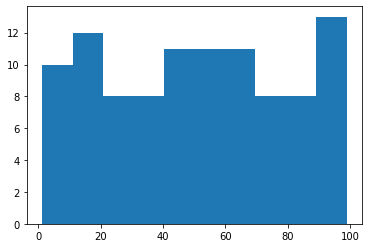

In [ ]:
# 8 Histogram of Uniformly and Normally distributed random numbers

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
a = np.random.uniform(1,100,100)
b = range(1,101)
plt.hist(a)

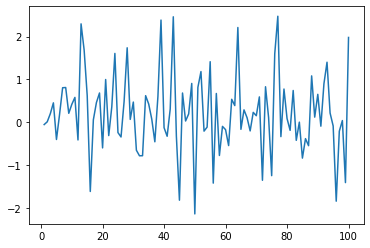

In [ ]:
a = np.random.randn(100)
b = range(1,101)
plt.plot(b,a)

(array([9.0000e+00, 3.2500e+02, 3.1740e+03, 1.5948e+04, 3.3954e+04,
        3.1706e+04, 1.2538e+04, 2.1850e+03, 1.5100e+02, 1.0000e+01]),
 array([-4.6556287 , -3.70628923, -2.75694976, -1.80761029, -0.85827081,
         0.09106866,  1.04040813,  1.9897476 ,  2.93908707,  3.88842654,
         4.83776601]),
 <a list of 10 Patch objects>)

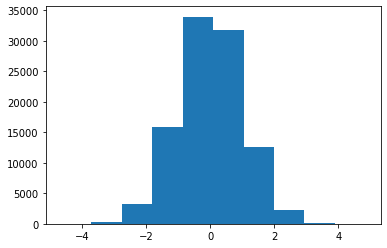

In [ ]:
a = np.random.randn(100000)
b = range(1,101)
plt.hist(a)

In [ ]:
#9 Monte Carlo Simulations to find value of pi

#def pi_run(nums,loops):
pi_avg = 0
pi_value_list = []
for i in range(100):
  value = 0
  x = np.random.uniform(0,1,1000).tolist()
  y = np.random.uniform(0,1,1000).tolist()
  for j in range(1000):
    z = np.sqrt(x[j]*x[j]+y[j]*y[j])
    if z<=1:
      value += 1
  float_value = float(value)
  pi_value = float_value*4/1000
  pi_value_list.append(pi_value)
  pi_avg += pi_value

3.1472399999999987


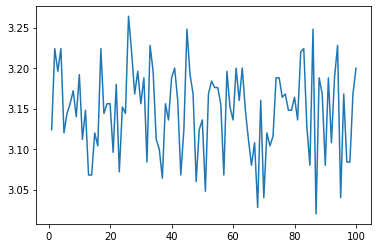

In [ ]:
pi = pi_avg/100
print(pi)
ind = range(1,101)
fig = plt.plot(ind,pi_value_list)
fig

In [ ]:
# 10 Generating a dummy data frame

import pandas as pd
data = pd.read_csv('Customer Churn Model.txt') 
column_list=data.columns.values.tolist()
a=len(column_list)
d=pd.DataFrame({'Column_Name':column_list,'A':np.random.randn(a),'B':2.5*np.random.randn(a)+1.5})
d

,Column_Name,A,B
0,State,0.022536,2.262123
1,Account Length,-0.533996,-4.007197
2,Area Code,1.093875,1.077333
3,Phone,1.615490,-1.383253
4,Int'l Plan,-0.012997,5.120719
5,VMail Plan,-0.762601,-2.014780
6,VMail Message,-1.161647,1.948791
7,Day Mins,0.048163,2.525015
8,Day Calls,-1.530371,1.134497
9,Day Charge,-0.767579,-0.652474


In [ ]:
len(data)

3333

In [ ]:
a = np.random.randn(len(data))
check = a <0.8
training = data[check]
testing = data[~check]

In [ ]:
len(training)
len(testing)

669

In [ ]:
(669/3333)*100

20.072007200720073

In [ ]:
# Method 2
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2)

In [ ]:
#### Examples
import pandas as geek
dt_test = geek.read_csv("https://media.geeksforgeeks.org/wp-content/uploads/nba.csv")
# Integer slicing
print("Slicing only rows(till index 4):")
x1 = data.iloc[:4, ]
print(x1, "\n")
   
print("Slicing rows and columns(rows=4, col 1-4, excluding 4):")
x2 = data.iloc[:4, 1:4]
print(x2)

Slicing only rows(till index 4):
  State  Account Length  Area Code  ... Intl Charge CustServ Calls  Churn?
0    KS             128        415  ...        2.70              1  False.
1    OH             107        415  ...        3.70              1  False.
2    NJ             137        415  ...        3.29              0  False.
3    OH              84        408  ...        1.78              2  False.

[4 rows x 21 columns] 

Slicing rows and columns(rows=4, col 1-4, excluding 4):
   Account Length  Area Code     Phone
0             128        415  382-4657
1             107        415  371-7191
2             137        415  358-1921
3              84        408  375-9999
